In [1]:
import os
os.chdir('./../')

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

In [3]:
train_df = pd.read_csv('./data/train.csv')
train_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

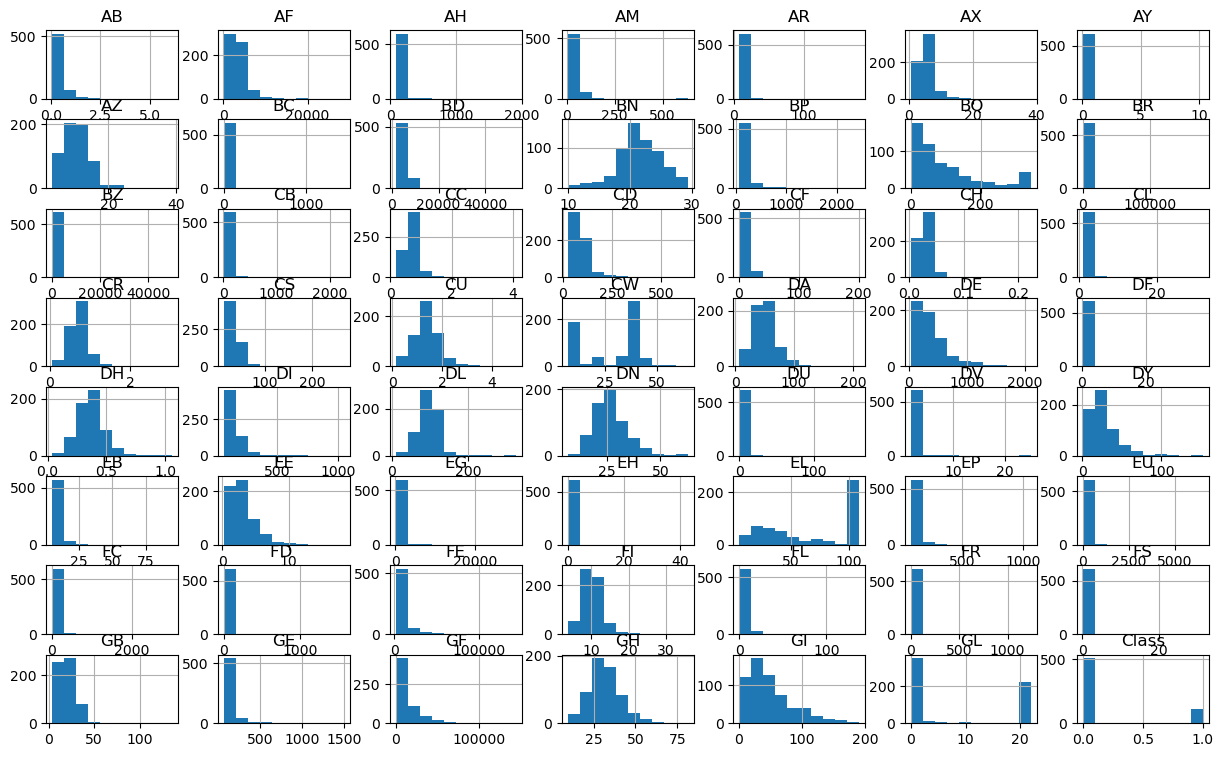

In [6]:
train_df.hist(figsize=(15, 9));

In [8]:
train_df.loc[:, 'EJ'].describe()

count     617
unique      2
top         B
freq      395
Name: EJ, dtype: object

In [9]:
train_df['EJ'].unique()

array(['B', 'A'], dtype=object)

In [10]:
avg_a = train_df['Class'][train_df['EJ'] == 'A'].mean()
avg_b = train_df['Class'][train_df['EJ'] == 'B'].mean()
avg_a, avg_b

(0.12612612612612611, 0.20253164556962025)

In [36]:
cols_to_transform = train_df.columns[~train_df.columns.isin(['Id', 'EJ', 'Class'])]

In [37]:
power_transformer = PowerTransformer()

In [38]:
corrected_train_df = pd.DataFrame(data=power_transformer.fit_transform(train_df.loc[:, cols_to_transform]),
                                  columns=cols_to_transform,
                                  index=train_df.index)

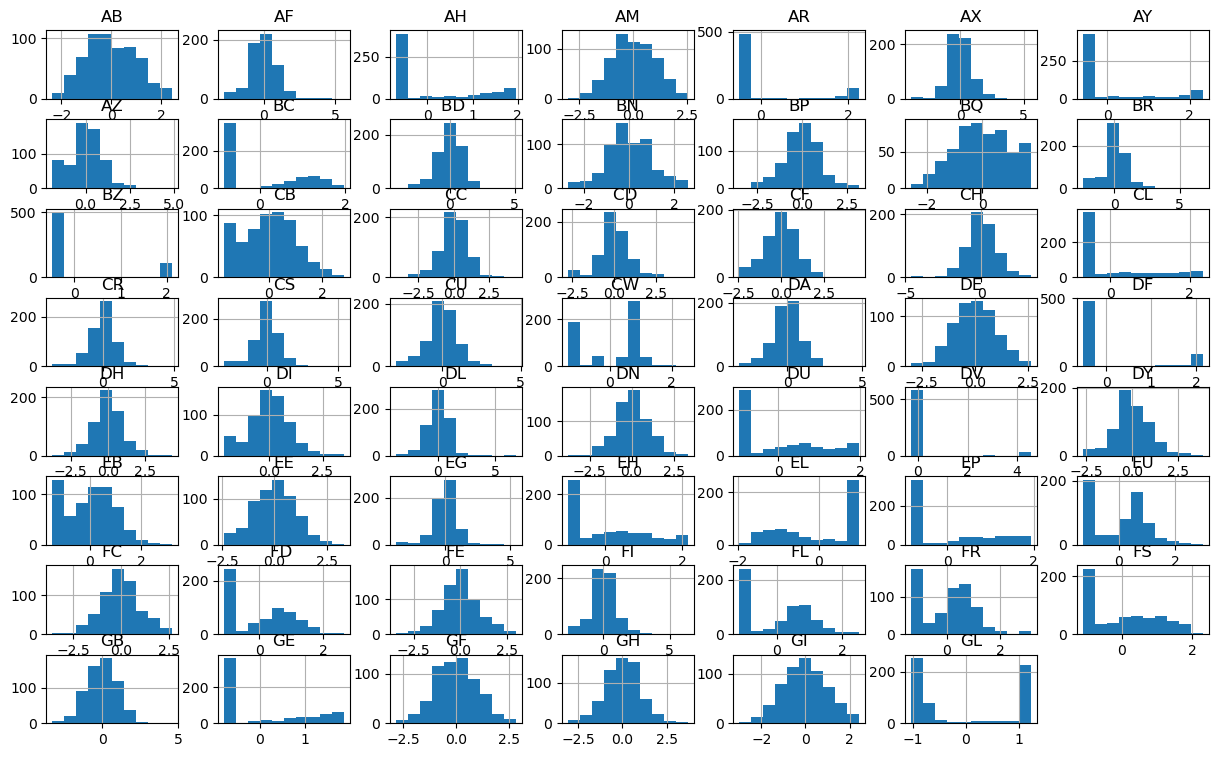

In [39]:
corrected_train_df.hist(figsize=(15, 9));

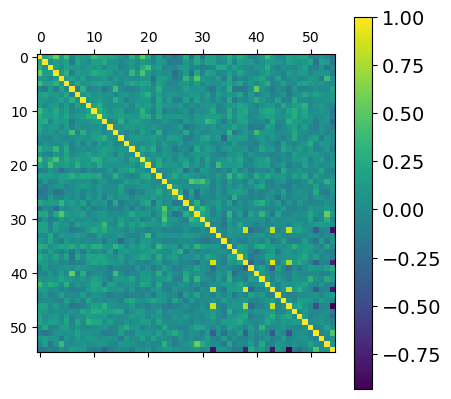

In [42]:
plt.matshow(corrected_train_df.corr());
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [43]:
correlation_df = corrected_train_df.corr().abs()

In [48]:
high_correlations = {}
for col in correlation_df:
    high = correlation_df[col][correlation_df[col] > 0.9]
    if len(high) > 1:
        high_correlations[col] = high
high_correlations

{'EH': EH     1.000000
 FD     0.926746
 Name: EH, dtype: float64,
 'FD ': EH     0.926746
 FD     1.000000
 Name: FD , dtype: float64,
 'FL': FL    1.000000
 GL    0.933062
 Name: FL, dtype: float64,
 'GL': FL    0.933062
 GL    1.000000
 Name: GL, dtype: float64}

In [51]:
corrected_train_df['Class'] = train_df['Class']

In [54]:
corrected_train_df.loc[:, ['EH', 'FD ', 'Class']].corr()

,EH,FD,Class
EH,1.000000,0.926746,0.195611
FD,0.926746,1.000000,0.162301
Class,0.195611,0.162301,1.000000


In [56]:
corrected_train_df.loc[:, ['GL', 'FL', 'Class']].corr()

,GL,FL,Class
GL,1.000000,-0.933062,-0.152731
FL,-0.933062,1.000000,0.242101
Class,-0.152731,0.242101,1.000000
